<a href="https://colab.research.google.com/github/ProtonX-AI/machine-learning-with-tensorflow-and-pytorch/blob/master/04-Library/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hướng dẫn biễu diễn dữ liệu
> **Matplotlib** và **Seaborn** là những thư viện trực quan phổ biến nhất khi nói đến trực quan hóa tập dữ liệu của bạn bằng python. Matplotlib cho phép bạn kiểm soát ở mức độ thấp đối với mọi thành phần của biểu đồ, trong khi seaborn cho phép bạn tạo các biểu đồ tinh vi với một vài dòng mã.

![alt text](https://seabornnetworks.com/2020/wp-content/themes/seaborn/assets/img/seaborn-type.svg)





In [1]:
import pandas as pd
import numpy as np
# pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Một số dataset của Seaborn

In [2]:
iris = sns.load_dataset('iris')
attention = sns.load_dataset('dots')
planets = sns.load_dataset('planets')
fmri = sns.load_dataset("fmri")
tips = sns.load_dataset("tips")

## Những Khởi tạo ban đầu

Để bắt đầu biểu diễn một số biểu đồ  bạn cầu một không gian biễn diễn, nó được gọi là **Figure**. Một **Figure** có thể bao gồm một hoặc nhiều biểu đồ, chúng được gọi là **Axes** (Bản vẽ). Mỗi **Axes** có thể đi kèm với **titles**, **x-axis**, **y-axis**, and **legend** (chú thích), v.v. 

![alt text](https://miro.medium.com/max/1240/1*9DTLPjvTGvo8h2lYBfDiHA.png)

## Biểu diễn những đối tượng rời rạc (scatter)

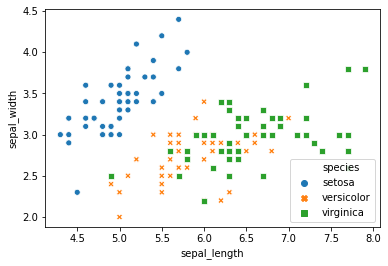

In [3]:
# Biểu diễn đối tượng rời rạc thông qua seaborn
sns.scatterplot(x='sepal_length', y='sepal_width' , data=iris, hue='species', style="species")

# Dữ liệu vẫn có thể đưa vào api theo dạng vector độc lập
# sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species, style=iris.species)

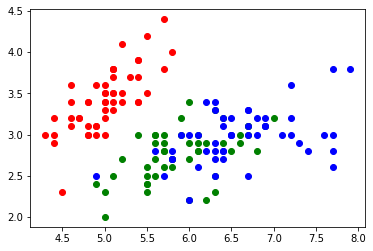

In [4]:
# Biểu diễn đối tượng rời rạc thông qua matplotlib
plt.scatter(iris.sepal_length[iris.species == 'setosa'], iris.sepal_width[iris.species == 'setosa'], color='r')
plt.scatter(iris.sepal_length[iris.species == 'versicolor'], iris.sepal_width[iris.species == 'versicolor'], color='g')
plt.scatter(iris.sepal_length[iris.species == 'virginica'], iris.sepal_width[iris.species == 'virginica'], color='b')
plt.show()

## Biễu diễn dữ liệu liên tục (continuity)

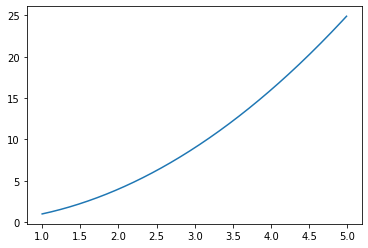

In [5]:
# Biểu diễn đối tượng liên tục thông qua seaborn
t = np.arange(1.0, 5.0, 0.01)
sns.lineplot(t,t**2)

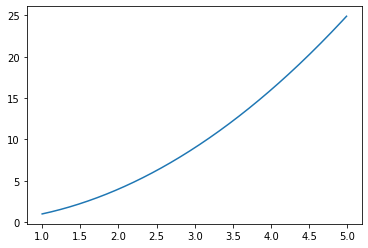

In [6]:
# Biểu diễn đối tượng liên tục thông qua matplotlib
plt.plot(t,t**2)
plt.show()

Ngoài ra đễ biểu diễn đối tượng biến số thay đổi liên tục, chúng ta vẫn có thể sử dụng lineplot

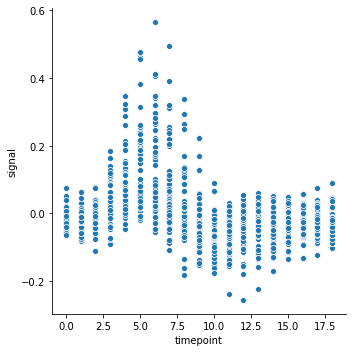

In [7]:
sns.relplot(x="timepoint", y="signal", data=fmri)

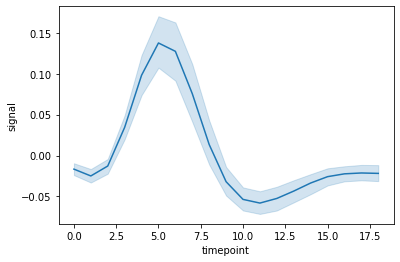

In [8]:
sns.lineplot(x="timepoint", y="signal", data=fmri)
# Một cách biễn diễn khác
# sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

## Biễn diễn phân phối đơn
Cách thuận tiện nhất để xem nhanh một phân phối đơn trong seaborn là hàm distplot (). Theo mặc định, điều này sẽ vẽ biểu đồ phân phooois với ước tính mật độ hạt nhân (KDE).

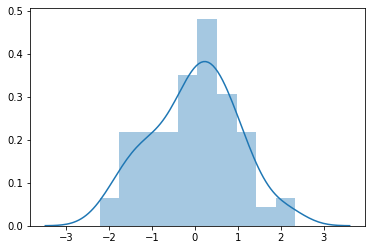

In [9]:
x = np.random.normal(size=100)
sns.distplot(x, bins=10);

### Histograms
Biểu đồ có thể quen thuộc và chức năng hist đã tồn tại trong matplotlib. Biểu đồ thể hiện sự phân phối dữ liệu bằng cách tạo các cột dọc theo phạm vi của dữ liệu và sau đó vẽ các thanh để hiển thị số lượng quan sát rơi vào mỗi cột.

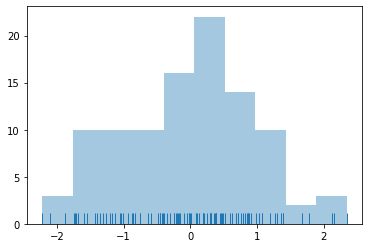

In [10]:
sns.distplot(x, kde=False, rug=True, bins=10);

### Kernel density estimation
Ước tính mật độ hạt nhân có thể ít quen thuộc hơn, nhưng nó có thể là một công cụ hữu ích để vẽ hình dạng của phân phối. Giống như biểu đồ, các ô KDE mã hóa mật độ quan sát trên một trục có chiều cao dọc theo trục mật độ:

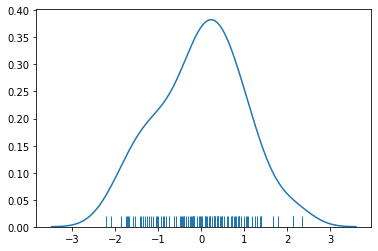

In [11]:
sns.distplot(x, hist=False, rug=True);

Một các khác để vẻ phân phối mật ddooj

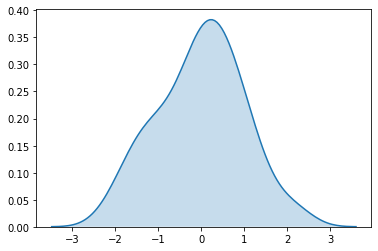

In [12]:
sns.kdeplot(x, shade=True)

## Biễn diễn phân phối bivariate (kép)

In [13]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### Scatterplots

Cách quen thuộc nhất để hình dung một phân phối bivariate là một biểu đồ phân tán, trong đó mỗi quan sát được hiển thị với điểm tại các giá trị x và y. Bạn có thể vẽ một biểu đồ phân tán bằng scatterplot() và đó cũng là loại biểu đồ mặc định được hiển thị bởi hàm jointplot():

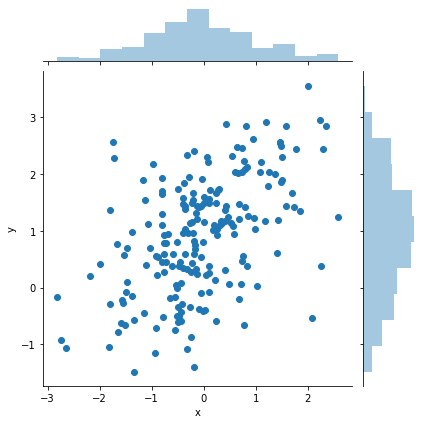

In [14]:
sns.jointplot(x="x", y="y", data=df);

## Biễn diễn phân phối tuyến tính
Nhiều bộ dữ liệu chứa nhiều biến định lượng và mục tiêu của phân tích thường là liên kết các biến đó với nhau. 

Các hàm để vẽ mô hình hồi quy tuyến tính
Hai chức năng chính trong seaborn được sử dụng để biễu diễn một mối quan hệ tuyến tính được xác định thông qua hồi quy. Các hàm này, regplot () và lmplot () có sự tương đồng chặt chẽ với nhau và chia sẻ nhiều chức năng cốt lõi của chúng. Tuy nhiên, điều quan trọng là phải hiểu cách chúng khác nhau, để bạn có thể nhanh chóng chọn công cụ chính xác cho công việc cụ thể.

Trong cách gọi đơn giản nhất, cả hai hàm đều vẽ một biểu đồ phân tán gồm hai biến, x và y, sau đó khớp với mô hình hồi quy y ~ x và vẽ đường hồi quy kết quả và khoảng tin cậy 95% cho hồi quy đó:

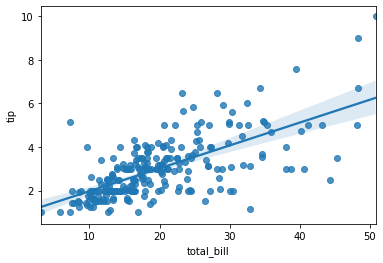

In [15]:
sns.regplot(x="total_bill", y="tip", data=tips);

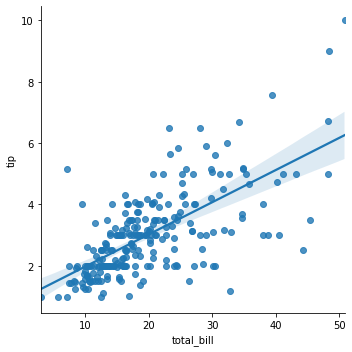

In [16]:
sns.lmplot(x="total_bill", y="tip", data=tips);

Biễn diễn đường tuyến tính thông qua matplotlib

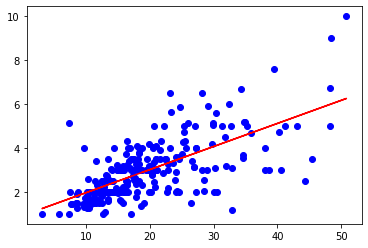

In [17]:
x = tips.total_bill
y = tips.tip

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'bo', x, poly1d_fn(x), 'r-')
plt.show()

### Ứng dụng với các loại mô hình khác nhau

Mô hình hồi quy tuyến tính đơn giản được sử dụng ở trên rất đơn giản để phù hợp, tuy nhiên, nó không phù hợp với một số loại dữ liệu. Bộ dữ liệu Anscombe cho thấy một vài ví dụ trong đó hồi quy tuyến tính đơn giản cung cấp ước tính giống hệt nhau về mối quan hệ trong đó kiểm tra trực quan đơn giản cho thấy rõ sự khác biệt. Ví dụ, trong trường hợp đầu tiên, hồi quy tuyến tính là một mô hình tốt:

In [18]:
anscombe = sns.load_dataset("anscombe")

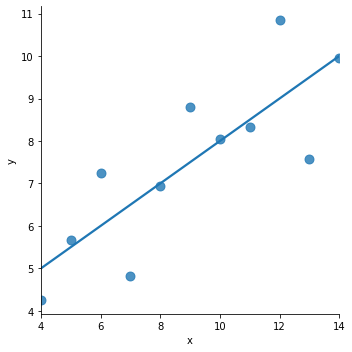

In [19]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, scatter_kws={"s": 80});

Mối quan hệ tuyến tính trong tập dữ liệu thứ hai vẫn dữ nguyên, nhưng biễn diễn cho thấy rõ đây không phải là một mô hình tốt:

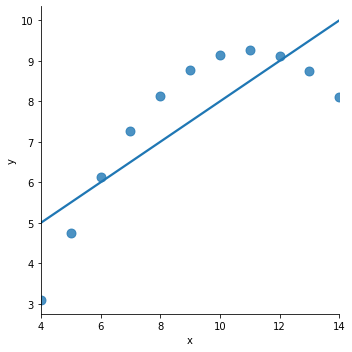

In [20]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 80});

Với sự hiện diện của các mối quan hệ bậc cao này, lmplot () và regplot () có thể phù hợp với mô hình hồi quy đa thức để khám phá các loại xu hướng phi tuyến đơn giản trong tập dữ liệu:

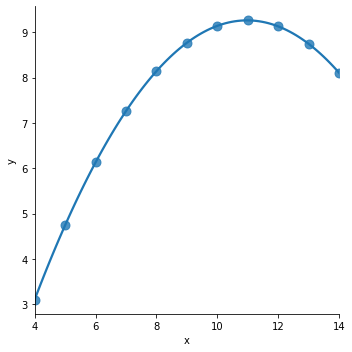

In [21]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None, scatter_kws={"s": 80});

Một vấn đề khác được đặt ra bởi các "outlier" khiến đường biễn diễn lệch đi vì một số lý do khác với mối quan hệ chính đang được nghiên cứu:

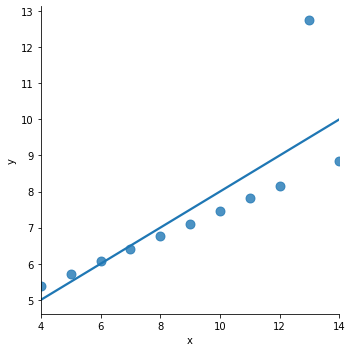

In [22]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), ci=None, scatter_kws={"s": 80});

Chúng ta có thể  sử dụng hàm mất khác để loại bỏ các "outline" tương đối chính xác:

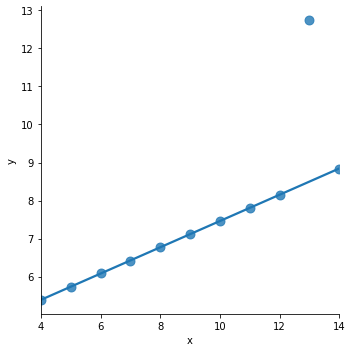

In [23]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80});

Khi biến y là nhị phân, hồi quy tuyến tính đơn giản cũng có thể hoạt động và nhưng cung cấp các dự đoán phù hợp:

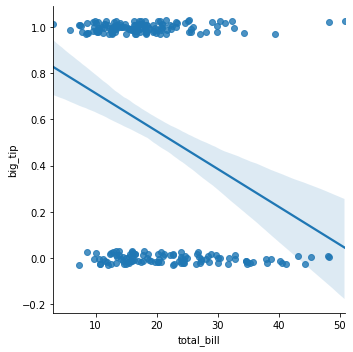

In [24]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.03);

Giải pháp trong trường hợp này là phù hợp với hồi quy logistic, sao cho đường hồi quy cho thấy xác suất ước tính của y = 1 với mỗi x:

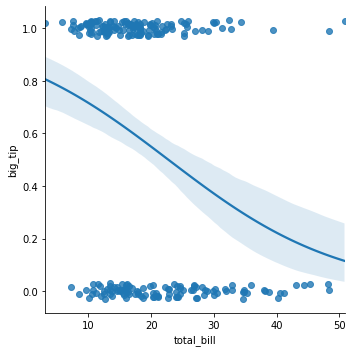

In [25]:
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03);

## Biểu diễn mẫu trong phân loại tuyến tính

In [26]:
# tạo đường tuyến tính
data=iris[iris.species.isin(['setosa','versicolor'])]
X = data[['sepal_length','sepal_width']].to_numpy()
y = data['species'].replace('setosa', 0).replace('versicolor', 1)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
ys = (70.37572870226627-xs*93.6813857)/(-137.59453525)

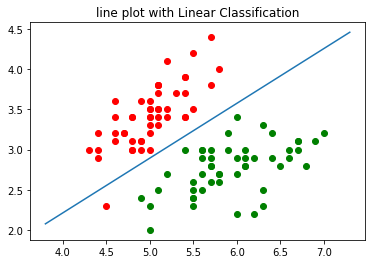

In [27]:
# Biểu diễn phân loại tuyến tính thông qua matplotlib
plt.scatter(iris.sepal_length[iris.species == 'setosa'], iris.sepal_width[iris.species == 'setosa'], color='r')
plt.scatter(iris.sepal_length[iris.species == 'versicolor'], iris.sepal_width[iris.species == 'versicolor'], color='g')
plt.plot(xs,ys)
plt.title('line plot with Linear Classification')
plt.show()

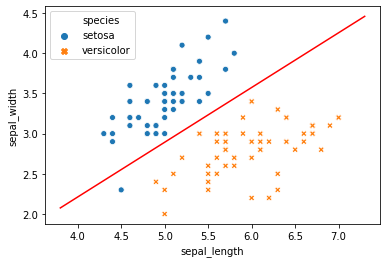

In [28]:
# Biểu diễn phân loại tuyến tính thông qua seaborn
sns.scatterplot(x='sepal_length', y='sepal_width' , data=iris[iris.species.isin(['setosa','versicolor'])], hue='species', style="species")
sns.lineplot(xs,ys,color='red')

## Biểu diễn mẫu trong phân loại logit

In [29]:
from sklearn.linear_model import LogisticRegression

x = np.arange(10).reshape(-1, 1).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

p = model.predict_proba(x)
y_ped = model.predict(x)

info_plot = pd.DataFrame()
info_plot['p'] = p[:,1]
info_plot['y'] = y
info_plot['y_ped'] = y_ped
info_plot['ped_true'] = y == y_ped

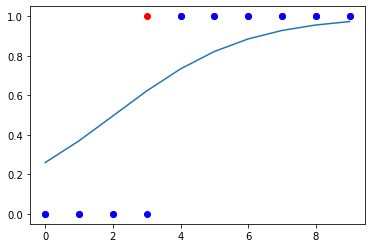

In [30]:
# Biểu diễn phân loại tuyến tính thông qua matplotlib
plt.plot(info_plot.index,info_plot.p)
plt.scatter(info_plot.index,info_plot.y_ped, color='r')
plt.scatter(info_plot.index,info_plot.y, color='b')

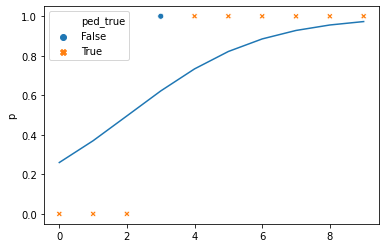

In [31]:
# Biểu diễn phân loại tuyến tính thông qua seaborn
sns.scatterplot(x=info_plot.index, y='y_ped' , data=info_plot, hue='ped_true', style="ped_true")
sns.lineplot(info_plot.index,info_plot.p)

Ví dụ trên tập dữ liệu iris

In [32]:
from sklearn.linear_model import LogisticRegression
# read data
data = iris[iris.species.isin(['setosa','versicolor'])]
x = data.iloc[ : , :-1 ].to_numpy()
y = data['species'].replace('setosa', 0).replace('versicolor', 1).to_numpy()
# model init
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
#model predict
p = model.predict_proba(x)
y_ped = model.predict(x)

# logit = np.hstack((p, y.reshape(y.shape[0],1)))
# logit = np.hstack((logit, yp.reshape(yp.shape[0],1)))
# logit = np.sort(logit, axis=0, kind='quicksort', order=None)

info_plot = pd.DataFrame()
info_plot['p'] = p[:,1]
info_plot['y'] = y
info_plot['y_ped'] = y_ped
info_plot['ped_true'] = y == y_ped
info_plot = info_plot.sort_values('p')
info_plot = info_plot.reset_index()

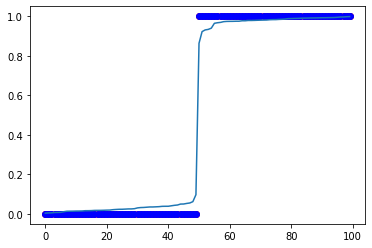

In [33]:
# Biểu diễn phân loại tuyến tính thông qua matplotlib
plt.plot(info_plot.index,info_plot.p)
plt.scatter(info_plot.index,info_plot.y_ped, color='r')
plt.scatter(info_plot.index,info_plot.y, color='b')

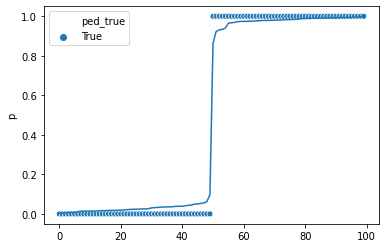

In [34]:
# Biểu diễn phân loại tuyến tính thông qua seaborn
sns.scatterplot(x=info_plot.index, y='y_ped' , data=info_plot, hue='ped_true', style="ped_true")
sns.lineplot(info_plot.index,info_plot.p)

## Heatmap


### Example of Confusion Matrix

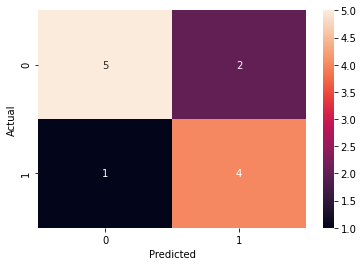

In [35]:
data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

### Example of Attention Matrix

In [36]:
vi = "vì mặc dù đã bị bắt , nhưng cuối cùng học cũng được thả ra nhờ vào sức ép từ cộng đồng quốc tế ."
en = "Because even though it was arrested , but finally the same time were released by the pressure of the international community . "

In [37]:
vi = vi.split(" ")
en = en.split(" ")

In [38]:
arr = np.array([[0.7607843 , 0.01568628, 0.00392157, 0.        , 0.00784314,
        0.00392157, 0.01960784, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05490196],
       [0.1254902 , 0.49411765, 0.09019608, 0.02352941, 0.00392157,
        0.01960784, 0.01176471, 0.00392157, 0.01568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471],
       [0.23137255, 0.40784314, 0.5803922 , 0.09019608, 0.00784314,
        0.01568628, 0.04313726, 0.01176471, 0.02352941, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157],
       [0.01960784, 0.09803922, 0.05490196, 0.30588236, 0.08235294,
        0.01960784, 0.01960784, 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.00392157, 0.08627451, 0.14901961, 0.38039216, 0.5254902 ,
        0.15294118, 0.03137255, 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.02352941, 0.20784314, 0.19607843, 0.3372549 ,
        0.76862746, 0.03921569, 0.        , 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02745098, 0.08235294, 0.09019608,
        0.10196079, 0.6509804 , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.03137255,
        0.00392157, 0.20392157, 1.        , 0.05098039, 0.01568628,
        0.        , 0.02352941, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157],
       [0.        , 0.00784314, 0.        , 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.0627451 , 0.65882355, 0.04705882,
        0.16470589, 0.09019608, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00784314, 0.00392157,
        0.00784314, 0.02352941, 0.02352941, 0.16862746, 0.14509805,
        0.3019608 , 0.07058824, 0.00392157, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00784314, 0.03921569, 0.00392157,
        0.00392157, 0.00784314, 0.01960784, 0.2       , 0.6       ,
        0.62352943, 0.7058824 , 0.04313726, 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.01176471, 0.        , 0.00392157, 0.05098039,
        0.02352941, 0.04705882, 0.02745098, 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.02352941,
        0.00392157, 0.00784314, 0.        , 0.00392157, 0.12156863,
        0.01176471, 0.08235294, 0.4509804 , 0.11764706, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.01568628, 0.00784314, 0.        , 0.        , 0.10588235,
        0.01176471, 0.07843138, 0.47058824, 0.8509804 , 0.02745098,
        0.00392157, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.00392157, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.00392157,
        0.        , 0.00392157, 0.09019608, 0.08235294, 0.08627451,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02745098, 0.        , 0.        , 0.00784314,
        0.        , 0.00784314, 0.04313726, 0.04705882, 0.8509804 ,
        0.05882353, 0.        , 0.09411765, 0.00392157, 0.        ,
        0.        , 0.00392157, 0.00392157],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.11764706,
        0.03137255, 0.        , 0.04705882, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.02745098, 0.02745098, 0.02352941, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01960784,
        0.8980392 , 0.93333334, 0.16078432, 0.1882353 , 0.08235294,
        0.01176471, 0.01568628, 0.00392157],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01960784,
        0.03529412, 0.01960784, 0.52156866, 0.07450981, 0.01960784,
        0.00392157, 0.16078432, 0.01568628],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02352941, 0.01960784, 0.1254902 , 0.07450981, 0.03529412,
        0.27058825, 0.13333334, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.01568628, 0.11764706, 0.05882353, 0.09803922,
        0.8156863 , 0.42745098, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02352941, 0.08627451, 0.01568628, 0.36078432, 0.61960787,
        0.02745098, 0.01960784, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01960784, 0.02745098, 0.01176471, 0.37254903, 0.28235295,
        0.00784314, 0.04705882, 0.01960784],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.31764707, 0.9843137 ]])

In [39]:
import matplotlib.ticker as ticker

def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(20,12))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')
  fontdict = {'fontsize': 16}
  cax = ax.matshow(np.array(attention))
  fig.colorbar(cax)

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

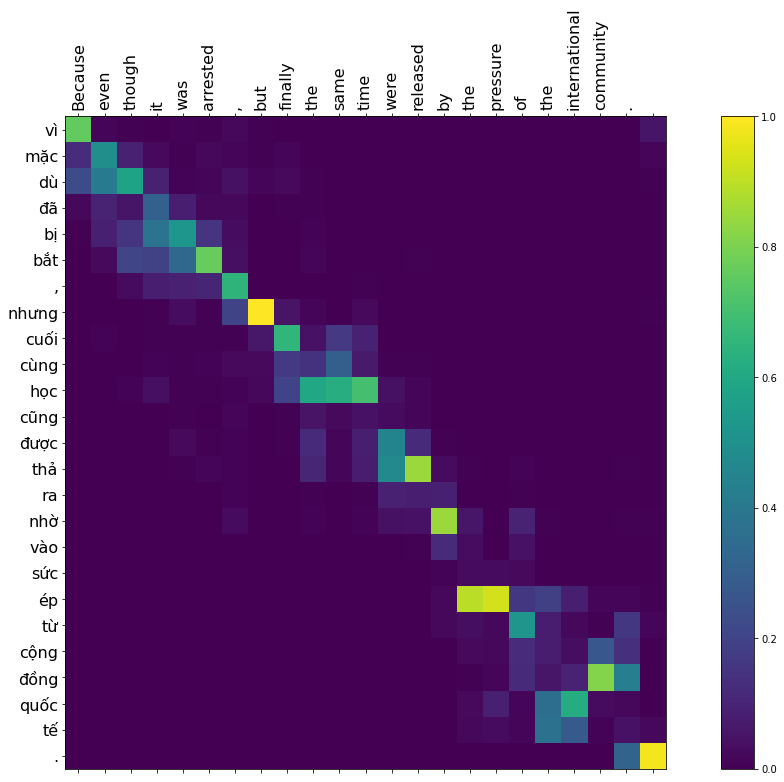

In [40]:
plot_attention(arr, en, vi)